In [1]:
import yfinance as yf

In [2]:
msft = yf.Ticker("MSFT")
msft

yfinance.Ticker object <MSFT>

In [3]:
hist = msft.history(period = "1mo")
hist.shape

(21, 7)

In [4]:
msft.history_metadata

{'currency': 'USD',
 'symbol': 'MSFT',
 'exchangeName': 'NMS',
 'fullExchangeName': 'NasdaqGS',
 'instrumentType': 'EQUITY',
 'firstTradeDate': 511108200,
 'regularMarketTime': 1728331202,
 'hasPrePostMarketData': True,
 'gmtoffset': -14400,
 'timezone': 'EDT',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 409.54,
 'fiftyTwoWeekHigh': 417.11,
 'fiftyTwoWeekLow': 409.0,
 'regularMarketDayHigh': 417.11,
 'regularMarketDayLow': 409.0,
 'regularMarketVolume': 19536309,
 'longName': 'Microsoft Corporation',
 'shortName': 'Microsoft Corporation',
 'chartPreviousClose': 401.7,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EDT',
   'start': 1728374400,
   'end': 1728394200,
   'gmtoffset': -14400},
  'regular': {'timezone': 'EDT',
   'start': 1728394200,
   'end': 1728417600,
   'gmtoffset': -14400},
  'post': {'timezone': 'EDT',
   'start': 1728417600,
   'end': 1728432000,
   'gmtoffset': -14400}},
 'dataGranularity': '1d',
 'range': '1mo',
 'validRang

In [9]:
financials = msft.balance_sheet
print(financials)

- MSFT: Failed to create balance-sheet financials table for reason: YFinanceDataException("Parsing FinancialTemplateStore failed, reason: KeyError('FinancialTemplateStore')")
Empty DataFrame
Columns: []
Index: []


In [7]:
print(msft.actions,msft.dividends,msft.splits,msft.capital_gains)

Empty DataFrame
Columns: [Dividends, Stock Splits]
Index: [] Series([], Name: Dividends, dtype: float64) Series([], Name: Stock Splits, dtype: float64) []


In [11]:
msft.get_shares_full(start="2024-10-1",end=None)

2024-10-03 00:00:00-04:00    7433039872
2024-10-05 00:00:00-04:00    7433039872
2024-10-05 00:00:00-04:00    7441610240
dtype: int64

In [17]:
msft.major_holders

,Breakdown,Unnamed: 1
0,0.05%,% of Shares Held by All Insider
1,73.67%,% of Shares Held by Institutions
2,73.71%,% of Float Held by Institutions
3,6851,Number of Institutions Holding Shares


In [18]:
msft.mutualfund_holders

,Holder,Shares,Date Reported,% Out,Value
0,Vanguard Total Stock Market Index Fund,234.79M,2024-06-30,0.0316,96155217950
1,Vanguard 500 Index Fund,190.76M,2024-06-30,0.0257,78122038177
2,Fidelity 500 Index Fund,91.56M,2024-08-31,0.0123,37499439145
3,SPDR S&P 500 ETF Trust,88.07M,2024-08-31,0.0118,36068920810
4,iShares Core S&P 500 ETF,81.51M,2024-08-31,0.0110,33380129295
5,Vanguard Growth Index Fund,73.33M,2024-06-30,0.0099,30031460298
6,"Invesco ETF Tr-Invesco QQQ Tr, Series 1 ETF",55.55M,2024-08-31,0.0075,22751038079
7,Vanguard Institutional Index Fund-Institutiona...,48.31M,2024-06-30,0.0065,19783337532
8,Growth Fund Of America Inc,40.61M,2024-06-30,0.0055,16630499920
9,Select Sector SPDR Fund-Technology,35.34M,2024-08-31,0.0048,14473941685


In [27]:
wasd = {}

for news in msft.news:
    
    wasd[news['title']]=news['link']
    print(news['title'],wasd[news['title']],'\n')


Google Talks to Utilities About Nuclear Power for Data Centers https://finance.yahoo.com/news/google-talks-utilities-nuclear-power-051321306.html 

Microsoft (MSFT) Falls More Steeply Than Broader Market: What Investors Need to Know https://finance.yahoo.com/news/microsoft-msft-falls-more-steeply-214521335.html 

Nvidia Overtakes Microsoft as World's Second-Largest Company by Market Cap https://finance.yahoo.com/m/e08eaa06-d4b6-3585-b787-d879b240159f/nvidia-overtakes-microsoft-as.html 

Is Microsoft Corporation (NASDAQ:MSFT) the Best AI Stock to Buy? https://finance.yahoo.com/news/microsoft-corporation-nasdaq-msft-best-205415799.html 

What Magnificent 7 Tech Stocks? Only 2 Are Beating the Market. https://finance.yahoo.com/m/d0b410e7-c94a-3586-91f2-5d29f644e131/what-magnificent-7-tech.html 

Apple stock downgraded by Jefferies, which says 'serious AI' smartphones are 2 years away https://finance.yahoo.com/news/apple-stock-downgraded-by-jefferies-which-says-serious-ai-smartphones-are-2-

In [42]:
tech = yf.Industry('technology')

AttributeError: module 'yfinance' has no attribute 'Industry'

# How to predict a price of a stock given its historic data

### Following are my proposed approaches

1. Just simply using polynomial regression and then predicting the price of the stocks

2. Obtaining the other stock prices of the same sector/industry and then compare it with the stock of our interest and then create some column which gives the relative performance SOI(stock of interest) with the weighted mean of the stock price of stocks

3. Obtaining some data using technical indicators and then train the regressional models/xgboost to predict the price of the SOI

In [4]:
import yfinance as yf
msft = yf.Ticker('MSFT')
msft_hist = msft.history(period='1mo',interval='15m')
print(msft_hist.head())

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-09-09 09:30:00-04:00  407.239990  408.649994  405.700012  408.204987   
2024-09-09 09:45:00-04:00  408.220001  408.320007  406.329987  406.720001   
2024-09-09 10:00:00-04:00  406.760010  406.813812  405.187988  405.980011   
2024-09-09 10:15:00-04:00  405.920013  406.260010  404.000000  404.309998   
2024-09-09 10:30:00-04:00  404.290100  404.380005  402.825012  402.829987   

                            Volume  Dividends  Stock Splits  
Datetime                                                     
2024-09-09 09:30:00-04:00  1703687        0.0           0.0  
2024-09-09 09:45:00-04:00   684787        0.0           0.0  
2024-09-09 10:00:00-04:00   405316        0.0           0.0  
2024-09-09 10:15:00-04:00   463604        0.0           0.0  
2024-09-09 10:30:00-04:00   469902        0.0           0.0  


In [6]:
print(msft_hist.shape)

(551, 7)


In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

In [72]:
x_required_stuff = msft_hist[['Close','High','Low','Volume']].iloc[:-1]
x_required_stuff

,Close,High,Low,Volume
Datetime,,,,
2024-09-09 09:30:00-04:00,408.204987,408.649994,405.700012,1703687
2024-09-09 09:45:00-04:00,406.720001,408.320007,406.329987,684787
2024-09-09 10:00:00-04:00,405.980011,406.813812,405.187988,405316
2024-09-09 10:15:00-04:00,404.309998,406.260010,404.000000,463604
2024-09-09 10:30:00-04:00,402.829987,404.380005,402.825012,469902
...,...,...,...,...
2024-10-07 14:45:00-04:00,409.390015,410.765686,409.190002,758681
2024-10-07 15:00:00-04:00,410.179993,410.193115,409.220001,612840
2024-10-07 15:15:00-04:00,410.207397,410.519989,410.000000,397020


In [73]:
y_required_stuff = msft_hist[['Open']].iloc[1:]
y_required_stuff

,Open
Datetime,
2024-09-09 09:45:00-04:00,408.220001
2024-09-09 10:00:00-04:00,406.760010
2024-09-09 10:15:00-04:00,405.920013
2024-09-09 10:30:00-04:00,404.290100
2024-09-09 10:45:00-04:00,402.744995
...,...
2024-10-07 15:00:00-04:00,409.390015
2024-10-07 15:15:00-04:00,410.200012
2024-10-07 15:30:00-04:00,410.200012


In [74]:
poly = PolynomialFeatures(degree=3)
poly_x = poly.fit_transform(x_required_stuff)
print(poly_x)

[[1.00000000e+00 4.08204987e+02 4.08649994e+02 ... 2.80414102e+11
  1.17756432e+15 4.94503567e+18]
 [1.00000000e+00 4.06720001e+02 4.08320007e+02 ... 1.13061113e+11
  1.90541635e+14 3.21119383e+17]
 [1.00000000e+00 4.05980011e+02 4.06813812e+02 ... 6.65436889e+10
  6.65647122e+13 6.65857421e+16]
 ...
 [1.00000000e+00 4.10207397e+02 4.10519989e+02 ... 6.67390620e+10
  6.46262010e+13 6.25802300e+16]
 [1.00000000e+00 4.09550110e+02 4.10290009e+02 ... 9.22806050e+10
  1.24233542e+14 1.67250454e+17]
 [1.00000000e+00 4.09660004e+02 4.10126312e+02 ... 2.98500231e+11
  1.30232513e+15 5.68190760e+18]]


In [75]:
x_train,x_test,y_train,y_test = train_test_split(poly_x,y_required_stuff,test_size=0.3,random_state=40)

In [76]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [77]:
y_pred = model.predict(x_test)
y_pred

array([[412.38382617],
       [415.08693878],
       [411.12434534],
       [419.99989784],
       [428.82824694],
       [413.41332025],
       [428.22610493],
       [429.08179153],
       [427.11508192],
       [432.92107504],
       [412.16424762],
       [426.99885639],
       [431.86142828],
       [430.65526552],
       [426.400589  ],
       [417.59774727],
       [438.77408708],
       [404.82100973],
       [419.00682632],
       [415.90675341],
       [439.48344589],
       [432.94637494],
       [416.28424957],
       [430.75888994],
       [432.14658019],
       [439.88514673],
       [421.26194453],
       [428.94861381],
       [420.15058378],
       [436.68002426],
       [435.70396123],
       [429.24754422],
       [417.02025148],
       [428.15869119],
       [406.0307115 ],
       [431.44629845],
       [416.71052224],
       [426.27219624],
       [433.6691418 ],
       [413.74094606],
       [415.9768329 ],
       [427.7923371 ],
       [423.9637755 ],
       [436

In [78]:
y_test

,Open
Datetime,
2024-09-10 13:45:00-04:00,412.260010
2024-09-11 12:15:00-04:00,415.230011
2024-09-09 09:45:00-04:00,408.220001
2024-10-01 11:30:00-04:00,420.054993
2024-09-13 11:45:00-04:00,428.850006
...,...
2024-09-27 12:30:00-04:00,428.570007
2024-09-12 11:30:00-04:00,420.529999
2024-09-17 14:15:00-04:00,435.084991


In [79]:
mse_score = MSE(y_pred,y_test)
print(np.sqrt(mse_score))

1.069734828963055


In [80]:
wasd = r2(y_pred,y_test)
print(wasd)

0.9869078915997577


In [81]:
print(msft_hist.tail())

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-07 15:00:00-04:00  409.390015  410.193115  409.220001  410.179993   
2024-10-07 15:15:00-04:00  410.200012  410.519989  410.000000  410.207397   
2024-10-07 15:30:00-04:00  410.200012  410.290009  409.255005  409.550110   
2024-10-07 15:45:00-04:00  409.579895  410.126312  409.000000  409.660004   
2024-10-07 16:00:00-04:00  409.540009  409.540009  409.540009  409.540009   

                            Volume  Dividends  Stock Splits  
Datetime                                                     
2024-10-07 15:00:00-04:00   612840        0.0           0.0  
2024-10-07 15:15:00-04:00   397020        0.0           0.0  
2024-10-07 15:30:00-04:00   550963        0.0           0.0  
2024-10-07 15:45:00-04:00  1784424        0.0           0.0  
2024-10-07 16:00:00-04:00        0        0.0           0.0  


In [91]:
loafer = msft_hist[['Close','High','Low','Volume']].iloc[-2:-1]

loafGod=poly.fit_transform(loafer)
loafGod


array([[1.00000000e+00, 4.09660004e+02, 4.10126312e+02, 4.09000000e+02,
        1.78442400e+06, 1.67821319e+05, 1.68012347e+05, 1.67550941e+05,
        7.31007142e+08, 1.68203592e+05, 1.67741662e+05, 7.31839235e+08,
        1.67281000e+05, 7.29829416e+08, 3.18416901e+12, 6.87496820e+07,
        6.88279385e+07, 6.86389193e+07, 2.99464389e+11, 6.89062841e+07,
        6.87170498e+07, 2.99805264e+11, 6.85283351e+07, 2.98981921e+11,
        1.30442669e+15, 6.89847189e+07, 6.87952691e+07, 3.00146526e+11,
        6.86063396e+07, 2.99322247e+11, 1.30591149e+15, 6.84179290e+07,
        2.98500231e+11, 1.30232513e+15, 5.68190760e+18]])

In [92]:
watta = model.predict(loafGod)
watta

array([[409.44521713]])

In [93]:
msft_hist.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-10-07 15:00:00-04:00,409.390015,410.193115,409.220001,410.179993,612840,0.0,0.0
2024-10-07 15:15:00-04:00,410.200012,410.519989,410.000000,410.207397,397020,0.0,0.0
2024-10-07 15:30:00-04:00,410.200012,410.290009,409.255005,409.550110,550963,0.0,0.0
2024-10-07 15:45:00-04:00,409.579895,410.126312,409.000000,409.660004,1784424,0.0,0.0
2024-10-07 16:00:00-04:00,409.540009,409.540009,409.540009,409.540009,0,0.0,0.0


In [94]:
import matplotlib.pyplot as plt

In [107]:

x_data = np.arange(1,547,1)
print(x_data)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

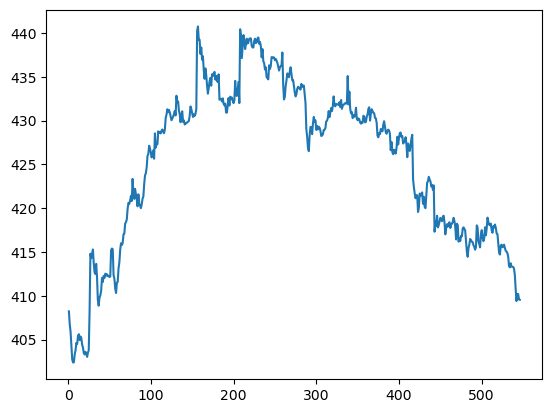

In [108]:
plt.plot(x_data,y_required_stuff)
plt.show()

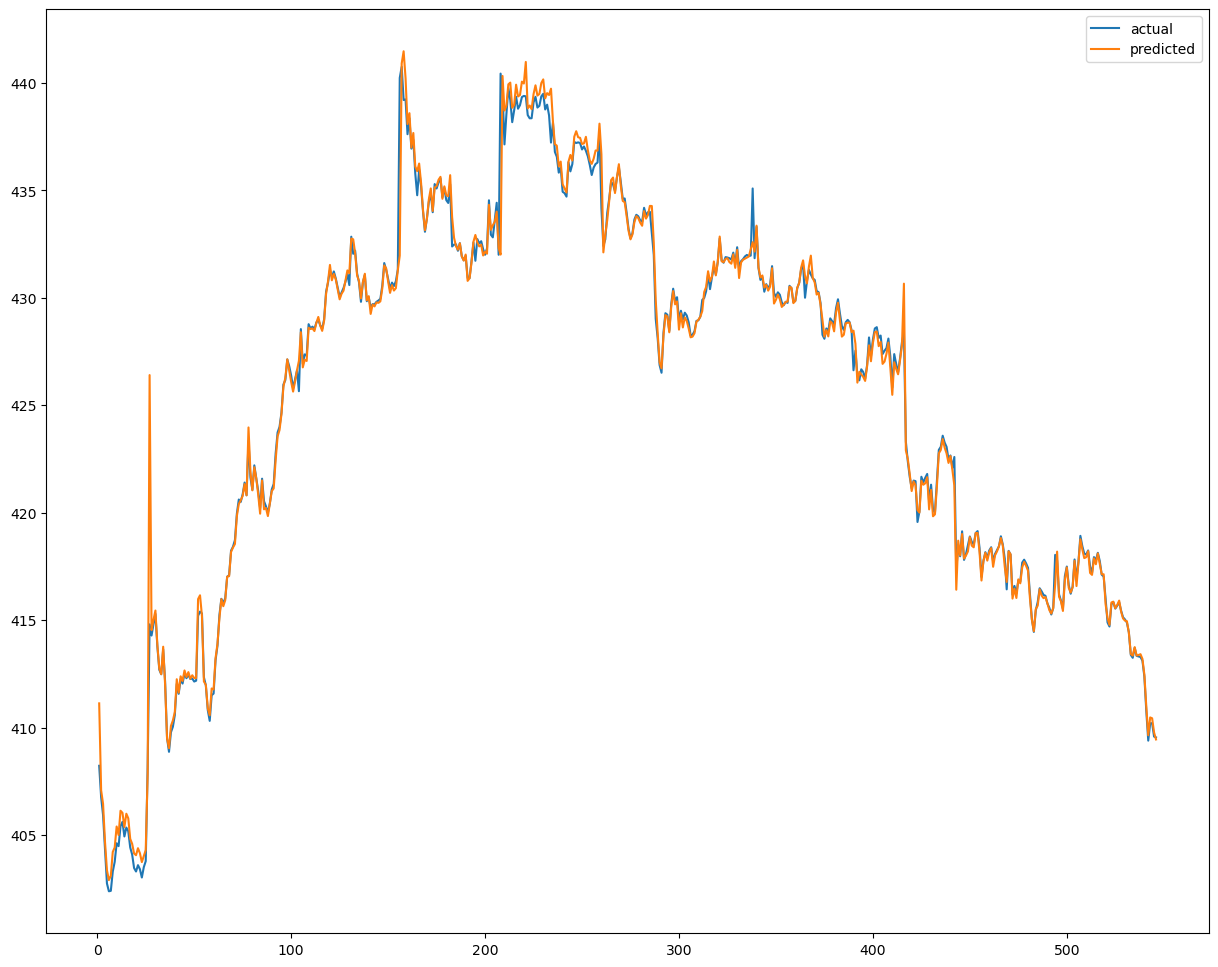

In [114]:
plt.figure(figsize=(15,12))
prediction_complete = model.predict(poly_x)
plt.plot(x_data,y_required_stuff, label='actual')
plt.plot(x_data,prediction_complete,label='predicted')
plt.legend()

## Things to be noted after training and predictions

1. **r2_score**:0.998 (Extremely good)
2. **MSE**:1.5 (I mean the error is 1/450 or 0.22% which imo is good enough)

## Challenges

1. We have used the Open,Close,Volume of the previous candle or interval to predict the open price of the next candle or the interval.
2. There is probably little to no difference in the close price of the given candle and to the Open price of the next candle since the Close price ideally must be equal to the open price of the next candle

## What strategy to adopt for using this model

1. We can use GAP strategy, which leverages the difference between the Close price of the given candle and the open price of the next candle to successfully place profitable trades(maybe long or short). The profit percentage will be minimal so we should use more capital or place highly leveraged futures orders.

# Strategy 1- GAP Strategy
## Implementing GAP strategy to see how much we can earn in a period of one month

Starting Capital = `$10,000`  
  
Expected returns per interval of 15 minutes is `0.05%`  
  
Expected Portfolio value by the end of the month is `$23,000`

**Achieved returns per one interval is `0.01%`**  
  
**Achieved Portfolio value by the end of the month is `$10,621.7`** 
  
**Percentage returns is `6.21%`**
  

In [131]:
pred_numpy = np.ravel(prediction_complete)
pred_numpy

array([411.12434534, 407.08220114, 406.44578835, 404.67411827,
       403.36170101, 402.8992897 , 403.10426946, 404.20949775,
       404.41888518, 405.39368525, 404.99834315, 406.12818324,
       406.0307115 , 405.36777976, 405.98862402, 405.77607921,
       404.82100973, 404.58796395, 404.13709109, 404.05926474,
       404.38391371, 404.15376256, 403.73800628, 404.01122089,
       404.29793951, 407.84533187, 426.400589  , 414.53228022,
       415.00468304, 415.44394125, 413.83375729, 412.7430553 ,
       412.4808143 , 413.76111243, 411.97919576, 409.48965997,
       409.03813499, 410.07611035, 410.32652626, 410.72088728,
       412.24713749, 411.62370995, 412.38382617, 412.16424762,
       412.6567236 , 412.34944062, 412.57857526, 412.27305102,
       412.43181044, 412.30423075, 412.30040453, 415.9768329 ,
       416.15390767, 415.18739541, 412.14276716, 411.98974699,
       410.89661447, 410.56706155, 411.81699436, 411.76959611,
       413.21851768, 413.89717658, 415.08693878, 415.97

In [118]:
close_values = x_required_stuff['Close']
close_values

Datetime
2024-09-09 09:30:00-04:00    408.204987
2024-09-09 09:45:00-04:00    406.720001
2024-09-09 10:00:00-04:00    405.980011
2024-09-09 10:15:00-04:00    404.309998
2024-09-09 10:30:00-04:00    402.829987
                                ...    
2024-10-07 14:45:00-04:00    409.390015
2024-10-07 15:00:00-04:00    410.179993
2024-10-07 15:15:00-04:00    410.207397
2024-10-07 15:30:00-04:00    409.550110
2024-10-07 15:45:00-04:00    409.660004
Name: Close, Length: 546, dtype: float64

In [139]:
actual_open = y_required_stuff['Open']
actual_open

Datetime
2024-09-09 09:45:00-04:00    408.220001
2024-09-09 10:00:00-04:00    406.760010
2024-09-09 10:15:00-04:00    405.920013
2024-09-09 10:30:00-04:00    404.290100
2024-09-09 10:45:00-04:00    402.744995
                                ...    
2024-10-07 15:00:00-04:00    409.390015
2024-10-07 15:15:00-04:00    410.200012
2024-10-07 15:30:00-04:00    410.200012
2024-10-07 15:45:00-04:00    409.579895
2024-10-07 16:00:00-04:00    409.540009
Name: Open, Length: 546, dtype: float64

In [150]:
starting_capital = 100000

for i in range(0,len(pred_numpy)):
    #long if the pred_numpy[i] > close_values[i]
    if(pred_numpy[i] > close_values[i]):
        number_of_shares = starting_capital/close_values[i]
        starting_capital+=number_of_shares*(actual_open[i]-close_values[i])
        #print(f"Number of Shares at {i} = {number_of_shares} and the capital = {starting_capital}")
    else:
        number_of_shares = starting_capital/close_values[i]
        starting_capital+=number_of_shares*(close_values[i]-actual_open[i])
        #print(f"Number of Shares at {i} = {number_of_shares} and the capital = {starting_capital}")
    #short if the pred_numpy[i] > close_values[i]

print(starting_capital)

106216.70875763649


# Strategy 2 - High & Low

Train a two models such that gives `Low` and `High` of the given candle nd we are leveraging this to make trades such  that we get a max.profit of `$(High-Low)*No of Shares` as the profit.

## Targets

Starting_Capital `$10,000`

Expected percentage per candle `0.5%`

Expected percentage returns traditionally `0.5*576 = 288%`

Expected percentage returns more aggressively `288*2 = 576%`

**By aggressive approach, I am saying that immediately after selling out long positions at the high of the current candle, we make another order of short and sell it after reaching near the Low of the next candle and then immediately making another long order.**  
  
**This makes sures that we get `twice` profit from the traditional approach**

In [10]:
msft_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-09-09 09:30:00-04:00,407.239990,408.649994,405.700012,408.204987,1703687,0.0,0.0
2024-09-09 09:45:00-04:00,408.220001,408.320007,406.329987,406.720001,684787,0.0,0.0
2024-09-09 10:00:00-04:00,406.760010,406.813812,405.187988,405.980011,405316,0.0,0.0
2024-09-09 10:15:00-04:00,405.920013,406.260010,404.000000,404.309998,463604,0.0,0.0
2024-09-09 10:30:00-04:00,404.290100,404.380005,402.825012,402.829987,469902,0.0,0.0
...,...,...,...,...,...,...,...
2024-10-08 09:30:00-04:00,410.695007,412.170013,408.190002,411.250000,2782776,0.0,0.0
2024-10-08 09:45:00-04:00,411.250000,413.989990,411.024689,413.329987,1343704,0.0,0.0
2024-10-08 10:00:00-04:00,413.329987,413.880005,412.649994,412.820007,990890,0.0,0.0


In [12]:
x_2 = msft_hist[['Open','Close','Volume']].iloc[:-1]
x_2

,Open,Close,Volume
Datetime,,,
2024-09-09 09:30:00-04:00,407.239990,408.204987,1703687
2024-09-09 09:45:00-04:00,408.220001,406.720001,684787
2024-09-09 10:00:00-04:00,406.760010,405.980011,405316
2024-09-09 10:15:00-04:00,405.920013,404.309998,463604
2024-09-09 10:30:00-04:00,404.290100,402.829987,469902
...,...,...,...
2024-10-07 15:45:00-04:00,409.579895,409.660004,1784424
2024-10-08 09:30:00-04:00,410.695007,411.250000,2782776
2024-10-08 09:45:00-04:00,411.250000,413.329987,1343704


In [13]:
y_2 = msft_hist[['High']].iloc[1:]
y_2

,High
Datetime,
2024-09-09 09:45:00-04:00,408.320007
2024-09-09 10:00:00-04:00,406.813812
2024-09-09 10:15:00-04:00,406.260010
2024-09-09 10:30:00-04:00,404.380005
2024-09-09 10:45:00-04:00,403.720001
...,...
2024-10-08 09:30:00-04:00,412.170013
2024-10-08 09:45:00-04:00,413.989990
2024-10-08 10:00:00-04:00,413.880005


In [19]:
poly1 = PolynomialFeatures(degree=3)
x_poly1 = poly1.fit_transform(x_2)
print(x_poly1)

[[1.00000000e+00 4.07239990e+02 4.08204987e+02 ... 2.83887598e+11
  1.18483514e+15 4.94503567e+18]
 [1.00000000e+00 4.08220001e+02 4.06720001e+02 ... 1.13278259e+11
  1.90724526e+14 3.21119383e+17]
 [1.00000000e+00 4.06760010e+02 4.05980011e+02 ... 6.68040896e+10
  6.66948265e+13 6.65857421e+16]
 ...
 [1.00000000e+00 4.11250000e+02 4.13329987e+02 ... 2.29560646e+11
  7.46284006e+14 2.42611191e+18]
 [1.00000000e+00 4.13329987e+02 4.12820007e+02 ... 1.68867829e+11
  4.05332688e+14 9.72918220e+17]
 [1.00000000e+00 4.12799988e+02 4.12959991e+02 ... 8.00013154e+10
  9.08804190e+13 1.03238935e+17]]


In [31]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_poly1,y_2,test_size=0.3,random_state=40)
x_train1

array([[1.00000000e+00, 4.30632385e+02, 4.30470001e+02, ...,
        5.04296719e+10, 3.18818571e+13, 2.01558482e+16],
       [1.00000000e+00, 4.22589996e+02, 4.17279999e+02, ...,
        2.89171492e+11, 1.15087524e+15, 4.58037479e+18],
       [1.00000000e+00, 4.15529999e+02, 4.16882111e+02, ...,
        7.91701769e+10, 8.65134147e+13, 9.45377568e+16],
       ...,
       [1.00000000e+00, 4.02399994e+02, 4.03299988e+02, ...,
        6.17440633e+10, 5.81173477e+13, 5.47036576e+16],
       [1.00000000e+00, 4.39339996e+02, 4.39399994e+02, ...,
        5.96761549e+10, 4.19779789e+13, 2.95285566e+16],
       [1.00000000e+00, 4.31839996e+02, 4.31785309e+02, ...,
        5.00324636e+10, 3.10956895e+13, 1.93262901e+16]])

In [32]:
model1 = LinearRegression()

In [33]:
model1.fit(x_train1,y_train1)
predict1=model1.predict(x_poly1)
print(predict1)

[[411.43529795]
 [408.00885508]
 [407.13398615]
 [405.47578134]
 [404.16226826]
 [404.02508984]
 [404.02291717]
 [405.06592375]
 [405.20472635]
 [405.85442889]
 [405.62664819]
 [406.61729928]
 [406.77637486]
 [405.82286254]
 [406.52227068]
 [406.20710079]
 [405.33168314]
 [405.21467938]
 [404.54809283]
 [404.50079361]
 [404.99734796]
 [404.65042833]
 [404.14572297]
 [405.8733938 ]
 [405.95549812]
 [409.4295415 ]
 [420.45860531]
 [415.71744862]
 [416.35491441]
 [416.35716902]
 [414.62628073]
 [413.51366216]
 [413.07332628]
 [414.46484074]
 [412.73283225]
 [410.29168224]
 [409.83441028]
 [410.85935797]
 [410.74936229]
 [411.41700727]
 [412.87051121]
 [412.08283135]
 [413.0514629 ]
 [412.68579046]
 [413.37447184]
 [412.81063709]
 [413.18330003]
 [413.8352103 ]
 [413.11000449]
 [412.91769665]
 [413.20937352]
 [417.62962096]
 [417.53615995]
 [416.15975078]
 [412.96018098]
 [412.85837847]
 [411.69827422]
 [411.40848623]
 [412.63932481]
 [412.29186921]
 [413.98659196]
 [414.61563367]
 [415.93

In [34]:
y_test_pred1 = model1.predict(x_test1)
print(r2(y_test_pred1,y_test))

0.9934092823557003


In [35]:
print(MSE(y_test_pred1,y_test))

0.6104465689053179


In [36]:
y_3 = msft_hist[['Low']].iloc[1:]
y_3

,Low
Datetime,
2024-09-09 09:45:00-04:00,406.329987
2024-09-09 10:00:00-04:00,405.187988
2024-09-09 10:15:00-04:00,404.000000
2024-09-09 10:30:00-04:00,402.825012
2024-09-09 10:45:00-04:00,402.299988
...,...
2024-10-08 09:30:00-04:00,408.190002
2024-10-08 09:45:00-04:00,411.024689
2024-10-08 10:00:00-04:00,412.649994


In [37]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x_poly1,y_3,test_size=0.3,random_state=40)
x_train2

array([[1.00000000e+00, 4.30632385e+02, 4.30470001e+02, ...,
        5.04296719e+10, 3.18818571e+13, 2.01558482e+16],
       [1.00000000e+00, 4.22589996e+02, 4.17279999e+02, ...,
        2.89171492e+11, 1.15087524e+15, 4.58037479e+18],
       [1.00000000e+00, 4.15529999e+02, 4.16882111e+02, ...,
        7.91701769e+10, 8.65134147e+13, 9.45377568e+16],
       ...,
       [1.00000000e+00, 4.02399994e+02, 4.03299988e+02, ...,
        6.17440633e+10, 5.81173477e+13, 5.47036576e+16],
       [1.00000000e+00, 4.39339996e+02, 4.39399994e+02, ...,
        5.96761549e+10, 4.19779789e+13, 2.95285566e+16],
       [1.00000000e+00, 4.31839996e+02, 4.31785309e+02, ...,
        5.00324636e+10, 3.10956895e+13, 1.93262901e+16]])

In [38]:
model2= LinearRegression()
model2.fit(x_train2,y_train2)

LinearRegression()

In [41]:
y_pred_low=model2.predict(x_poly1)

In [42]:
print(r2(y_pred_low,y_3))

0.9924468086854199


In [46]:
y_pred_low_real1 = np.ravel(y_pred_low)
y_pred_high_real1 =np.ravel(predict1)


In [51]:
y_3_array = np.array(y_3).ravel()
y_2_array = np.array(y_2).ravel()
y_2_array

array([408.32000732, 406.81381226, 406.26000977, 404.38000488,
       403.72000122, 403.58999634, 403.3500061 , 404.36999512,
       404.61499023, 405.17999268, 405.54000854, 405.94000244,
       405.77999878, 405.44500732, 405.6000061 , 405.42999268,
       405.12991333, 404.1789856 , 403.79000854, 403.80999756,
       403.92999268, 403.48999023, 403.67999268, 404.45999146,
       405.91000366, 414.8500061 , 415.3500061 , 416.32998657,
       415.56509399, 415.45999146, 413.92498779, 412.95999146,
       413.76998901, 414.06500244, 412.35998535, 409.9197998 ,
       410.23999023, 410.17999268, 411.33999634, 412.04989624,
       412.25750732, 412.57000732, 412.41000366, 412.75      ,
       412.82000732, 412.76998901, 412.54998779, 412.64001465,
       412.3500061 , 412.72000122, 414.73999023, 417.        ,
       416.26000977, 415.3500061 , 413.04998779, 412.1499939 ,
       411.14001465, 411.80999756, 411.89001465, 413.16000366,
       414.        , 415.6000061 , 416.        , 416.55

In [84]:
starter_fund1 = 10000
for i in range(0,len(y_pred_low)):
    bought_price =0
    sold_price=0
    isAlreadyBought=False
    #when the current price ie low price is less than y_pred_low buy long at y_pred_low
    if(y_3_array[i]<=y_pred_low_real1[i] and isAlreadyBought==False):
        bought_price = y_pred_low_real1[i]
        share_count = starter_fund1/bought_price
        print(f"Longed at{i} with pos.size = {bought_price}")
        isAlreadyBought=True
    if(y_3_array[i]>y_pred_low_real1[i] and isAlreadyBought==False):
        bought_price = y_3_array[i]
        share_count = starter_fund1/bought_price
        print(f"Longed at {i} with pos.size = {bought_price}")
        isAlreadyBought=True
    if(y_2_array[i]>=y_pred_high_real1[i] and isAlreadyBought == True):
        sold_price = y_pred_high_real1[i]
        starter_fund1+=share_count*(sold_price-bought_price)
        print(f"Sold at {i} price is {sold_price} with PnL = {(sold_price-bought_price)}")
        isAlreadyBought = False
    if(y_2_array[i]<y_pred_high_real1[i] and isAlreadyBought == True):
        sold_price = y_2_array[i]
        starter_fund1+=share_count*(sold_price-bought_price)
        print(f"Sold at {i} price is {sold_price} with PnL = {(sold_price-bought_price)}")
        isAlreadyBought = False
        
print(starter_fund1)

Longed at0 with pos.size = 408.23242769266545
Sold at 0 price is 408.32000732421875 with PnL = 0.08757963155329662
Longed at1 with pos.size = 406.67596803422276
Sold at 1 price is 406.8138122558594 with PnL = 0.13784422163661247
Longed at2 with pos.size = 405.8590950863107
Sold at 2 price is 406.260009765625 with PnL = 0.4009146793143259
Longed at3 with pos.size = 404.21927453880454
Sold at 3 price is 404.3800048828125 with PnL = 0.16073034400795905
Longed at4 with pos.size = 402.90258713307304
Sold at 4 price is 403.7200012207031 with PnL = 0.8174140876300839
Longed at5 with pos.size = 402.6403503306199
Sold at 5 price is 403.5899963378906 with PnL = 0.9496460072707009
Longed at6 with pos.size = 402.7613302423359
Sold at 6 price is 403.3500061035156 with PnL = 0.5886758611797518
Longed at7 with pos.size = 403.66432131703533
Sold at 7 price is 404.3699951171875 with PnL = 0.7056738001521694
Longed at8 with pos.size = 403.98060746424545
Sold at 8 price is 404.614990234375 with PnL = 0.6

In [82]:
# Now aggressive mode
starter_fund = 10000
bought_price =0
sold_price=0
isAlreadyBought=False
isShorted = False
for i in range(0,len(y_pred_low)):
    #when the current price ie low price is less than y_pred_low buy long at y_pred_low
    if(y_3_array[i]<=y_pred_low_real1[i]):
        if(isShorted == False):
            bought_price = y_pred_low_real1[i]
            share_count = starter_fund/bought_price
            print(f"Longed at {i} with pos.size = {bought_price}")
            isAlreadyBought=True
        else:
            sold_price = y_pred_low_real1[i]
            starter_fund+=share_count*(bought_price-sold_price)
            print(f"Solde at {i} price is {sold_price} with PnL = {share_count*(bought_price-sold_price)}")
            bought_price = y_pred_low_real1[i]
            share_count = starter_fund/bought_price
            print(f"Longed at {i} with pos.size = {bought_price}")
            isAlreadyBought=True
            isShorted=False
    if(y_3_array[i]>y_pred_low_real1[i]):
        if(isShorted == False):
            bought_price = y_3_array[i]
            share_count = starter_fund/bought_price
            print(f"Longed at {i} with pos.size = {bought_price}")
            isAlreadyBought=True
        else:
            bought_price = y_3_array[i]
            starter_fund+=share_count*(bought_price-sold_price)
            print(f"Solde at {i} price is {sold_price} with PnL = {share_count*(bought_price-sold_price)}")
            bought_price = y_pred_low_real1[i]
            share_count = starter_fund/bought_price
            print(f"Longed at {i} with pos.size = {bought_price}")
            isAlreadyBought=True
            isShorted=False
    if(y_2_array[i]>=y_pred_high_real1[i] and isAlreadyBought == True):
        sold_price = y_pred_high_real1[i]
        starter_fund+=share_count*(sold_price-bought_price)
        print(f"Sold at {i} price is {sold_price} with PnL = {share_count*(sold_price-bought_price)}")
        isAlreadyBought = False
        isShorted = True
        bought_price = sold_price
        share_count = starter_fund/bought_price
        print(f"Shorted at {i} with pos.size = {bought_price}")
        continue
    if(y_2_array[i]<y_pred_high_real1[i] and isAlreadyBought == True):
        sold_price = y_2_array[i]
        starter_fund+=share_count*(sold_price-bought_price)
        print(f"Sold at {i} price is {sold_price} with PnL = {share_count*(sold_price-bought_price)}")
        isAlreadyBought = False
        isShorted = True
        bought_price = sold_price
        share_count = starter_fund/bought_price
        print(f"Shorted at {i} with pos.size = {bought_price}")
        continue

        
print(starter_fund)

Longed at 0 with pos.size = 408.23242769266545
Sold at 0 price is 408.32000732421875 with PnL = 2.14533745024367
Shorted at 0 with pos.size = 408.32000732421875
Solde at 1 price is 406.67596803422276 with PnL = 40.27213857772439
Longed at 1 with pos.size = 406.67596803422276
Sold at 1 price is 406.8138122558594 with PnL = 3.4039120310558855
Shorted at 1 with pos.size = 406.8138122558594
Solde at 2 price is 405.8590950863107 with PnL = 23.57569451296666
Longed at 2 with pos.size = 405.8590950863107
Sold at 2 price is 406.260009765625 with PnL = 9.946725726053888
Shorted at 2 with pos.size = 406.260009765625
Solde at 3 price is 404.21927453880454 with PnL = 50.630806573098575
Longed at 3 with pos.size = 404.21927453880454
Sold at 3 price is 404.3800048828125 with PnL = 4.0279976913466715
Shorted at 3 with pos.size = 404.3800048828125
Solde at 4 price is 402.90258713307304 with PnL = 37.02496452574289
Longed at 4 with pos.size = 402.90258713307304
Sold at 4 price is 403.7200012207031 with

In [64]:
print(f"Low is {y_pred_low_real1[1]}, Lowreal is {y_3_array[1]}, High is {y_pred_high_real1[1]}, Highreal is {y_2_array[1]}")

Low is 406.67596803422276, Lowreal is 405.18798828125, High is 408.0088550791351, Highreal is 406.8138122558594


In [59]:
y_3

,Low
Datetime,
2024-09-09 09:45:00-04:00,406.329987
2024-09-09 10:00:00-04:00,405.187988
2024-09-09 10:15:00-04:00,404.000000
2024-09-09 10:30:00-04:00,402.825012
2024-09-09 10:45:00-04:00,402.299988
...,...
2024-10-08 09:30:00-04:00,408.190002
2024-10-08 09:45:00-04:00,411.024689
2024-10-08 10:00:00-04:00,412.649994


In [86]:
print(f"Intial capital is $10,000 Traditional method end size = {starter_fund1} PnL percentage = {((starter_fund1-10000)/10000)*100} and the aggressive method end size = {starter_fund} PnL percentage = {((starter_fund-10000)/10000)*100}")

Intial capital is $10,000 Traditional method end size = 26705.70864444617 PnL percentage = 167.0570864444617 and the aggressive method end size = 42940.23792284908 PnL percentage = 329.4023792284908


## Conclusions

**This strategy is clearly far better than the GAP strategy although this one contains some risks**

### Statistics
1. Inital Capital = `$10,000`
2. Traditional Portfolio size by the end = `$26706`
3. Traditional PnL = `168%`
4. Aggressive Portfolio size by the end = `$42,940`
5. Aggressive PnL = `330%`